# Linear Regression - Least Squares  

-------------  
Published: November 30, 2018
Author: Anjani K Shiwakoti  



## Project Overview
----------

**Motivation**: Least squares regression offer a way to build a closed-form and interpretable model.  

**Objectives**: Applying the mathematical foundations behind least squares regression  

**Problem**: Using housing data, we will attempt to predict house price using living area with a regression model.  

**Data Source**: [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).   


### Introduction and Review

As long as a few basic assumptions are fulfilled, linear regression using least squares is solvable exactly, without requiring approximation. 

This expresses the least squares coefficients $w_{LS}$ as a vector, and calculates that vector as a function of $X$, the matrix of inputs, and $y$, the vector of outputs from the training set:

$$w_{LS} = (X^T X)^(−1)X^T y,$$

where $w_{LS}$ refers to the vector of weights we are trying to find, $X$ is the matrix of inputs, and $y$ is the output vector. 

In this equation, $X$ is always defined to have a vector of $1$ values as its first column. In other words, even when there is only one input value for each data point, $X$ takes the form:

$$
X = \begin{bmatrix}
1 \  x_{11}  \\
1 \  x_{21}  \\
\vdots \ \vdots \\
1 \ x_{n1}
\end{bmatrix} 
$$

For two inputs per data point, $X$ will take this form:
 
$$
X = \begin{bmatrix}
1 \  x_{11} \  x_{12} \\
1 \  x_{21} \  x_{22} \\
\vdots \ \vdots \\
1 \ x_{n1} \  x_{n2}
\end{bmatrix} 
$$


### Data Exploration


In [119]:
### This cell imports the necessary modules and sets a few plotting parameters for display

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [103]:
### Read in the data
tr_path = 'datasets/house-prices/train.csv'
test_path = 'datasets/house-prices/test.csv'
data = pd.read_csv(tr_path)

In [104]:
### The .head() function shows the first few lines of data for perspecitve
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
### Lists column names
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Visualizations

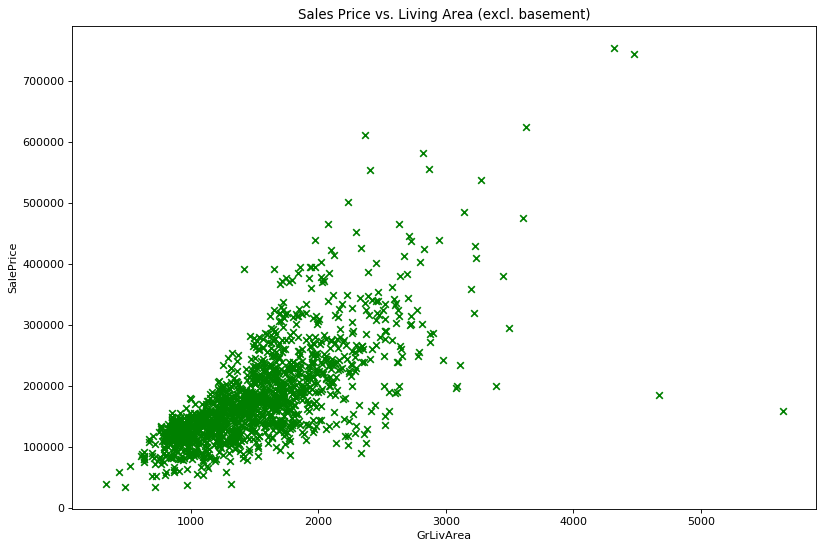

In [106]:
### Price v. living area

Y = data['SalePrice']
X = data['GrLivArea']
plt.figure (num=None, figsize=(12.0,8.0), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, Y, c="g", marker = "x")

### Annotations
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

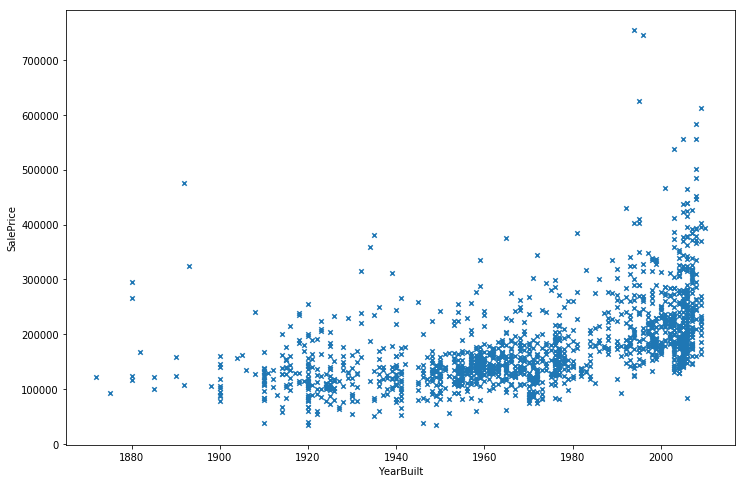

In [107]:
### plotting price v. year using pandas dataframe plot
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x', figsize=(12.0,8.0));

### Coding Linear Regression
Given the equation above for $w_{LS}$, we know all we need to in order to solve a linear regression. 


In [108]:
def inverse_of_matrix(mat):
    """Calculate and return the multiplicative inverse of a matrix.
    
    Positional argument:
        mat -- a square matrix to invert
        
    Requirements:
        This function depends on the numpy function `numpy.linalg.inv`. 
    """
    matrix_inverse = np.linalg.inv(mat)
    
    return matrix_inverse

### Testing function:

print("Test inverse of matrix:",inverse_of_matrix([[1,2],[3,4]]), "\n")
print("Inverse of matrix from Data:\n", inverse_of_matrix(data.iloc[:2,:2]))

Test inverse of matrix: [[-2.   1. ]
 [ 1.5 -0.5]] 

Inverse of matrix from Data:
 [[-0.2   0.6 ]
 [ 0.02 -0.01]]


#### Step 1: Read Data

In [109]:
def read_to_df(file_path):
    """Read on-disk data and return a dataframe."""
    
    data_frame = pd.read_csv(file_path)
    return data_frame


#### Step 2: Select columns from data frame

In [110]:
def select_columns(data_frame, column_names):
    """Return a subset of a data frame by column names.
    
    Positional arguments:
        data_frame -- a pandas DataFrame object
        column_names -- a list of column names to select
        
    """
    
    # dataframe is sliced by loc[rows, columns]
    # the first parameter gives all rows, that is, rows in location 0 to -1 or [:], 
    # the second parameter gives only those columns given in the list of column names
    # print (type(data_frame1)) to ensure output obect type is dataframe
    
    data_frame1 = data_frame.loc[:, data_frame.columns.isin(column_names)]  
    
    return data_frame1


#### Step 3: Subset Data by Value

In [111]:

def column_cutoff(data_frame, cutoffs):
    """Subset data frame by cutting off limits on column values.
    
    Positional arguments:
        data -- pandas DataFrame object
        cutoffs -- list of tuples in the format: 
        (column_name, min_value, max_value)
        
    """
    ### you do not want to change original dataframe
    df_new = data_frame.copy(deep=False)
    
    ### take the first element of first tuple from the list 
    ### and assign it to column name, and then to min, max respectively
    ### iterate over each tuple on the list
    
    for x in cutoffs:
        column_name = str(x[0])  
        min_val = float(x[1])
        max_val = float(x[2])
        
        # select column by name and compare all its elements to see if anything is below min_val or above max_val,
        # if so save them in a separate dataframe as you'll need access to its row indices next
        df_rows_to_delete = df_new[(df_new[column_name] < min_val) | (df_new[column_name] > max_val)] 
        
        # selecting indices of df_rows_to_delete, drop all rows with the matching indices from df_new 
        # if more than one data point exist, delete all rows starting from zero to end [:] 
        df_new = df_new.drop(df_rows_to_delete.index[:])  
        
    return (df_new)

Next you'll implement the equation above for $w_{LS}$ using the inverse matrix function.  
$$w_{LS} = (X^T X)^{−1}X^T y,$$

#### Step 4: Least Squares

In [112]:
### Build a function  called "least_squares_weights"
### take as input two matricies corresponding to the X inputs and y target
### assume the matrices are of the correct dimensions

### Step 1: Ensure that the number of rows of each matrix is greater than or equal to the number
### of columns.
### ### If not, then transpose the matrices.
### In particular, the y input should end up as a n-by-1 matrix, and the x input as a n-by-p matrix

### Step 2: Prepend an n-by-1 column of ones to the input_x matrix

### Step 3: Use the above equation to calculate the least squares weights.


def least_squares_weights(input_x, target_y):
    """Calculate linear regression least squares weights.
    
    Positional arguments:
        training_input_x -- matrix of training input data
        training_output_y -- vector of training output values
        
        The dimensions of X and y will be either p-by-n and 1-by-n
        Or n-by-p and n-by-1
        
    Assumptions:
        -- training_input_y is a vector whose length is the same as the
        number of rows in training_x
    """
    
    ### checking the rows of matrix to the columns
    ### if not equal or greater then transpose the matrices
    if not(len(input_x) >= len(input_x[0])):
        input_x = np.transpose(input_x)
    
    if not(len(target_y) >= len(target_y[0])):
        target_y = np.transpose(target_y)

    n = len(input_x) # number of samples
    y = target_y.reshape((n,1))
    X = np.hstack((np.ones((n,1), dtype=np.float64), input_x.reshape((n,1))))
    
    ### calculate least square weights
    lsw = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
    
    ### another way to calculate least square weights
    # w_LS = np.linalg.solve(np.dot(input_x.T, input_x), np.dot(input_x.T, target_y))
    # print(w_LS)
    
    return lsw


#### Testing on Real Data

Now that we have code to read the data and perform matrix operations, we can put it all together to perform linear regression on a data set of our choosing.  

In [113]:
df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[13454.06670576]
 [  110.78992341]]


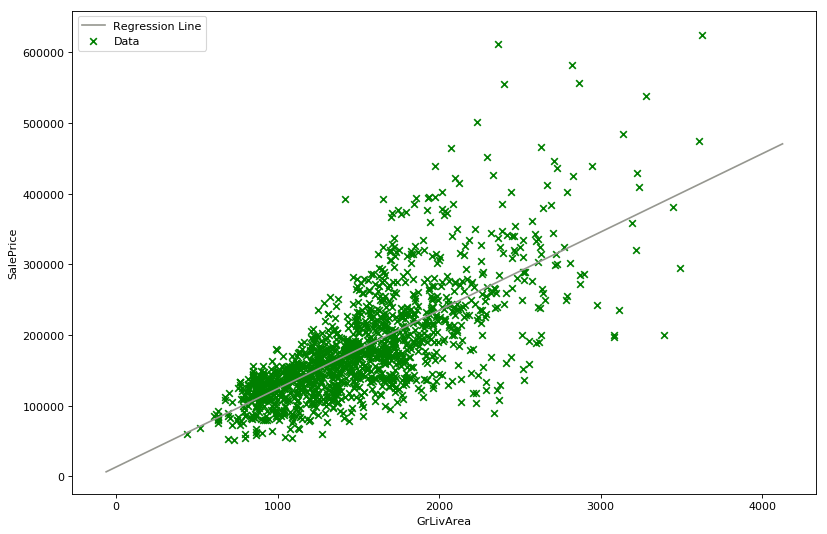

In [114]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.figure (num=None, figsize=(12.0,8.0), dpi=80, facecolor='w', edgecolor='k')
plt.plot(reg_x, reg_y, color='#969790', label='Regression Line')
plt.scatter(X, Y, c='g', marker = 'x', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

#### Model Evalutaion 
Calculate root mean squared errors with our calculated weights. Notice that the Root Mean Square Error is in the same units as the data.

#### Calculating Root Mean Squared Error (RMSE)

In [118]:
mse = []
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    mse.append((Y[i] - y_pred) ** 2)
rmse = np.sqrt(sum(mse)/len(Y))
print(rmse)

53092.484869486616


#### Calculating Coefficient of Determination ($R^2$)

In [116]:
ss_t = 0
ss_r = 0
mean_y = np.mean(Y)
for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.5163484562864966


### sklearn implementation

Applying one of the conventional methods to fit a model: `scikit-learn` module (also called `sklearn`.)  


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()

### sklearn requires a 2-dimensional X and 1 dimensional y. The below yeilds shapes of:
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)

print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

model = lr.predict(skl_X)
print ("Model: ", model)

MSE_sklearn = mean_squared_error(skl_Y, model)
print ("Root Mean Squared Error: ", MSE_sklearn**.5)

r_squared = r2_score (skl_Y, model)
print ("Coeficient of Determination (R-Squared):  ", r_squared)

Intercept: 13454.066705758654
Coefficient: [110.78992341]
Model:  [202904.83573302 153270.95004635 211324.86991201 ... 272702.48747991
 132885.60413932 152606.2105059 ]
Root Mean Squared Error:  53092.48486948661
Coeficient of Determination (R-Squared):   0.5163484562864981
